## 🧪 Projeto – Boosting Classificação

Uma **EdTech** possui uma plataforma de vendas para oferta de seus produtos de educação e, com o objetivo de priorizar melhor suas ações comerciais, quer desenvolver uma estratégia para **ampliar seu fator de conversão de leads** em vendas.  
Atualmente, as informações referentes a este processo de vendas encontram-se em uma **ferramenta de CRM**, da qual podem ser extraídos alguns insights.

Desta forma, para apoiar no desenvolvimento desta estratégia, iremos trabalhar num **algoritmo de classificação** que possa **prever se um lead será ou não convertido em venda**.  
E, dado o volume de dados e as features disponíveis, adotaremos o **método Adaptive Boosting** de *ensemble*, usando **algoritmos supervisionados de classificação**.

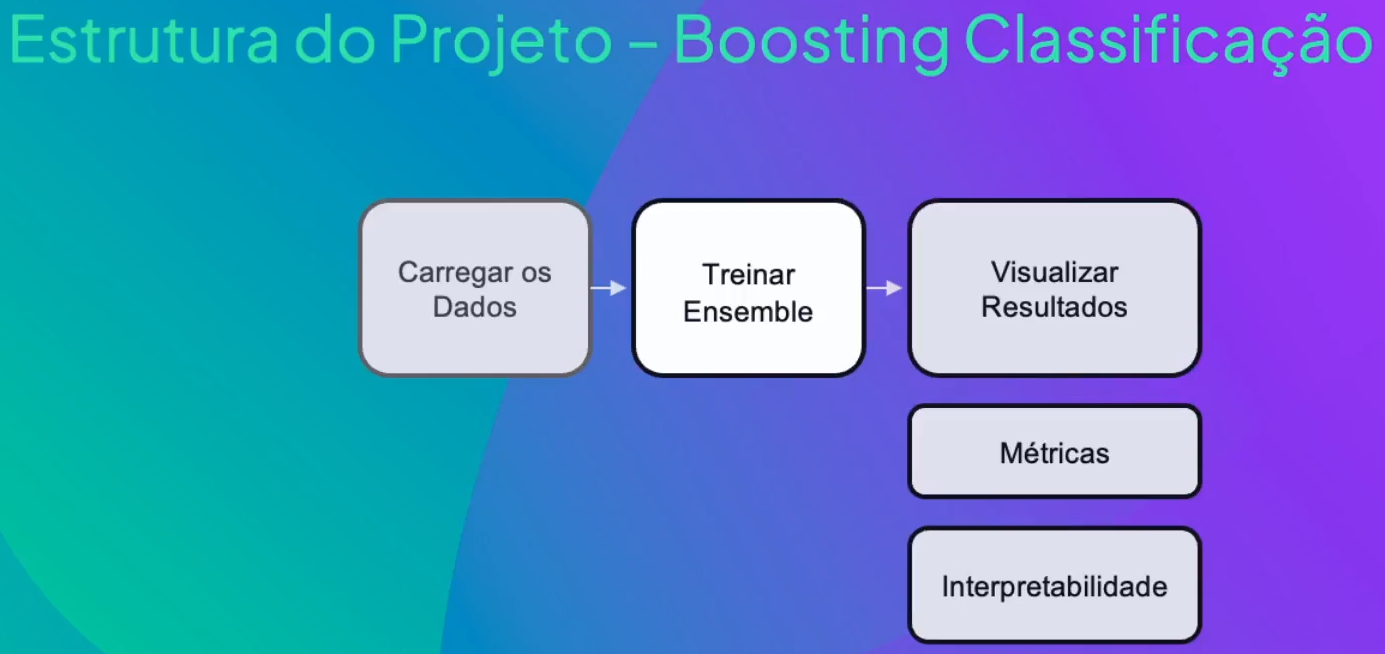

In [1]:
# Importar as bibliotecas

# EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

sns.set_style('whitegrid')

# ML
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Carregar os dados

In [2]:
# Carregar os dados
df_leads = pd.read_csv('./datasets/leads_cleaned.csv')

In [3]:
# Mostrar as primeiras linhas
df_leads.head(10)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0,Modified
5,API,Olark Chat,0,0,0,0.0,0,0.0,Olark Chat Conversation,0,0,0,0,0,0,0,Modified
6,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,0,0,0,0,0,0,0,Modified
7,API,Olark Chat,0,0,0,0.0,0,0.0,Olark Chat Conversation,0,0,0,0,0,0,0,Modified
8,Landing Page Submission,Direct Traffic,0,0,0,2.0,71,2.0,Email Opened,0,0,0,0,0,0,1,Email Opened
9,API,Google,0,0,0,4.0,58,4.0,Email Opened,0,0,0,0,0,0,0,Email Opened


In [4]:
# Mostrar as ultimas linhas
df_leads.tail(10)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
9064,Landing Page Submission,Google,0,0,0,2.0,870,2.00,Email Opened,0,0,0,0,0,0,0,Email Opened
9065,Landing Page Submission,Google,0,0,1,8.0,1016,4.00,Email Opened,0,0,0,0,0,0,0,Email Opened
9066,Landing Page Submission,Direct Traffic,0,0,0,2.0,1770,2.00,SMS Sent,0,0,0,0,0,0,1,SMS Sent
9067,API,Direct Traffic,0,0,1,13.0,1409,2.60,SMS Sent,0,0,0,0,0,0,0,SMS Sent
9068,Landing Page Submission,Direct Traffic,0,0,1,5.0,210,2.50,SMS Sent,0,0,0,0,0,0,0,Modified
9069,Landing Page Submission,Direct Traffic,1,0,1,8.0,1845,2.67,Email Marked Spam,0,0,0,0,0,0,0,Email Marked Spam
9070,Landing Page Submission,Direct Traffic,0,0,0,2.0,238,2.00,SMS Sent,0,0,0,0,0,0,1,SMS Sent
9071,Landing Page Submission,Direct Traffic,1,0,0,2.0,199,2.00,SMS Sent,0,0,0,0,0,0,1,SMS Sent
9072,Landing Page Submission,Google,0,0,1,3.0,499,3.00,SMS Sent,0,0,0,0,0,0,0,SMS Sent
9073,Landing Page Submission,Direct Traffic,0,0,1,6.0,1279,3.00,SMS Sent,0,0,0,0,0,0,1,Modified


In [5]:
# Mostrar estrutura do dataset
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9074 entries, 0 to 9073
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   int64  
 3   Do Not Call                             9074 non-null   int64  
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Search                                  9074 non-null   int64  
 10  Newspaper Article                       9074 non-null   int6

### Preparação dos dados

In [6]:
# Preparar os dados para o modelo
X = df_leads.drop(columns=['Converted'])
y = df_leads['Converted']

In [7]:
# Criar lista de colunas para a parte de interpretabilidade
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [8]:
# Usar o preprocessor ja salvo anteriormente
import joblib
preprocessor = joblib.load('./preprocessor_dataset_leads.pkl')

In [9]:
# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [10]:
# Aplicar preprocessor
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [11]:
# Mostrar a estrutura destes conjuntos
print(X_train.shape)
print(X_test.shape)

(7259, 68)
(1815, 68)


### Treinamento do Modelo

In [12]:
# Criar o modelo de BoostingClassifier
boosting_model = AdaBoostClassifier(
    estimator=LogisticRegression(),
    n_estimators=50,
    learning_rate=1.0,
    random_state=51
)

In [30]:
# Treinar o modelo
boosting_model.fit(X_train, y_train)

AdaBoostClassifier(estimator=LogisticRegression(), random_state=51)

### Avaliação do Modelo

In [31]:
# Fazer predicoes no conjunto de testes
y_pred = boosting_model.predict(X_test)

In [32]:
# Metricas do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [33]:
# Mostrar metricas
print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Acurácia: 0.7856749311294766
Precisão: 0.7004279600570613
Recall: 0.7328358208955223
F1 Score: 0.7162654996353027


In [34]:
# Mostrar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

fig = px.imshow(conf_matrix,
    labels=dict(x='Predição', y='Real', color='Contagem'),
    x=['Not Converted', 'Converted'],
    y=['Not Converted', 'Converted'],
    color_continuous_scale='Viridis'
)

fig.update_traces(text=conf_matrix, texttemplate="%{z}")
fig.update_layout(coloraxis_showscale=False)

fig.show()

In [35]:
# Calcular a importancia das variaveis
importances = np.mean([np.abs(estimator.coef_[0]) for estimator in boosting_model.estimators_], axis=0)

In [36]:
importances

array([7.87014215e-03, 2.29351700e-03, 5.26202104e-03, 1.65391587e-02,
       7.84892652e-03, 8.87315732e-04, 1.15324410e-03, 1.94983410e-03,
       1.60687155e-03, 4.80212266e-04, 1.15963161e-03, 7.78617432e-03,
       8.15773166e-03, 7.19073681e-03, 1.59276084e-02, 8.60252824e-04,
       8.39001932e-05, 6.07317457e-03, 9.78449844e-04, 3.73358991e-03,
       2.58900008e-05, 4.93016225e-05, 4.10016520e-03, 3.67911618e-03,
       3.32343687e-05, 1.04719208e-02, 1.34576571e-03, 8.27987559e-05,
       5.04933368e-05, 5.30948639e-03, 1.52165322e-04, 1.37375973e-04,
       2.77345307e-05, 3.36217551e-05, 3.19057799e-05, 4.94065943e-04,
       4.15046999e-03, 2.83624145e-03, 7.96261001e-04, 7.83008051e-05,
       4.33415867e-03, 1.55044636e-04, 6.64130935e-04, 1.99730344e-03,
       9.36002285e-03, 2.88845702e-03, 1.47370442e-04, 1.09204929e-02,
       1.41458366e-03, 6.81997511e-04, 2.29988441e-05, 2.90610627e-05,
       6.43748803e-05, 9.71099446e-04, 3.20621191e-04, 7.83008051e-05,
      

In [37]:
# Obter os nomes reais das features
feature_names = (numeric_features.tolist() + 
                 preprocessor.named_transformers_['cat'].
                 get_feature_names_out(categorical_features).tolist())

In [38]:
# Criar um dataframe combinando os nomes das variaveis com as importancias (coeficientes)
df_feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [39]:
# Ordenar dataframe pela importancia
df_feature_importances = df_feature_importances.sort_values(by='Importance', ascending=True)

In [40]:
# Plotar o gráfico de importância
fig = px.bar(df_feature_importances,
    x='Importance',
    y='Feature',
    orientation='h',
    title='Importância das Features (baseada nos coeficientes absolutos)'
)

fig.update_layout(height=1280, width=1000, yaxis={'categoryorder': 'total ascending'})

fig.show()


### Saídas do Modelo

In [41]:
# Erros dos estimadores
boosting_model.estimator_errors_

array([0.37994214, 0.25903465, 0.44301389, 0.33267367, 0.43273034,
       0.42626923, 0.43217547, 0.48644275, 0.4268625 , 0.46478223,
       0.46065486, 0.46999515, 0.43488796, 0.48436183, 0.46258432,
       0.47685372, 0.48452293, 0.47781898, 0.47395167, 0.48928659,
       0.47750794, 0.48789657, 0.48545929, 0.48847906, 0.48047169,
       0.48643136, 0.49735856, 0.49632236, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [43]:
# Pesos dos estimadores
boosting_model.estimator_weights_

array([0.48979381, 1.05099201, 0.22893916, 0.69611714, 0.27072002,
       0.29708911, 0.27298076, 0.05424229, 0.29466371, 0.14110472,
       0.1577066 , 0.12016377, 0.26193558, 0.0625731 , 0.14994301,
       0.09265133, 0.06192807, 0.08878236, 0.10428774, 0.04286018,
       0.09002898, 0.04842316, 0.05817924, 0.04609193, 0.07815299,
       0.05428788, 0.01056587, 0.01471083, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [44]:
# Predizer a probabilidade de conversao
y_pred_prob = boosting_model.predict_proba(X_test)

In [45]:
# Visualizar probabilidades
y_pred_prob

array([[0.28892438, 0.71107562],
       [0.55085138, 0.44914862],
       [0.55085138, 0.44914862],
       ...,
       [0.75407715, 0.24592285],
       [0.70374288, 0.29625712],
       [0.30284882, 0.69715118]])